In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Merged_WTA_Env.csv")

In [54]:
len(df['Mapped City'].unique())

107

In [55]:
extended_city_to_region = {'MUMBAI': 'Asia',
 'DOHA': 'Asia',
 'ABU DHABI': 'Asia',
 'HUA HIN': 'Asia',
 'ZHUHAI': 'Asia',
 'MONASTIR': 'Asia',
 'NANCHANG': 'Asia',
 'ZHENGZHOU': 'Asia',
 'HONG KONG': 'Asia',
 'SEOUL': 'Asia',
 'BEIJING': 'Asia',
 'NINGBO': 'Asia',
 'TOKYO': 'Asia',
 'GUANGZHOU': 'Asia',
 'CHENNAI': 'Asia',
 'OSAKA': 'Asia',
 'WUHAN': 'Asia',
 'ISTANBUL': 'Asia',
 'HOBART': 'Oceania',
 'AUCKLAND': 'Oceania',
 'ADELAIDE': 'Oceania',
 'CANBERRA': 'Oceania',
 'SYDNEY': 'Oceania',
 'BRISBANE': 'Oceania',
 'MELBOURNE': 'Oceania',
 'MONTEVIDEO': 'South America',
 'BUENOS AIRES': 'South America',
 'FLORIANOPOLIS': 'South America',
 'COLINA': 'South America',
 'BARRANQUILLA': 'South America',
 'CALI': 'South America',
 'BOGOTA': 'South America',
 'SANTA CRUZ': 'South America',
 'CANCUN': 'North America',
 'MIDLAND': 'North America',
 'TAMPICO': 'North America',
 'GUADALAJARA': 'North America',
 'SAN DIEGO': 'North America',
 'NEW YORK': 'North America',
 'CHICAGO': 'North America',
 'CLEVELAND': 'North America',
 'STANFORD': 'North America',
 'CINCINNATI': 'North America',
 'MONTREAL': 'North America',
 'WASHINGTON DC': 'North America',
 'MIAMI': 'North America',
 'INDIAN WELLS': 'North America',
 'AUSTIN': 'North America',
 'MONTERREY': 'North America',
 'MÉRIDA': 'North America',
 'GRANBY': 'North America',
 'VANCOUVER': 'North America',
 'CONCORD': 'North America',
 'TORONTO': 'North America',
 'SAN JOSE': 'North America',
 'SAN LUIS POTOSI': 'North America',
 'MERIDA': 'North America',
 'PARMA': 'Europe',
 'BUCHAREST': 'Europe',
 'LJUBLJANA': 'Europe',
 'BARI': 'Europe',
 'KOZERKI': 'Europe',
 'PRAGUE': 'Europe',
 'LAUSANNE': 'Europe',
 'WARSAW': 'Europe',
 'HAMBURG': 'Europe',
 'PALERMO': 'Europe',
 'IASI': 'Europe',
 'BUDAPEST': 'Europe',
 'BASTAD': 'Europe',
 'CONTREXEVILLE': 'Europe',
 'LONDON': 'Europe',
 'EASTBOURNE': 'Europe',
 'BAD HOMBURG': 'Europe',
 'BIRMINGHAM': 'Europe',
 'GAIBA': 'Europe',
 'BERLIN': 'Europe',
 'NOTTINGHAM': 'Europe',
 "S'HERTOGENBOSCH": 'Europe',
 'VALENCIA': 'Europe',
 'MAKARSKA': 'Europe',
 "LA BISBAL D'EMPORDÁ": 'Europe',
 'STRASBOURG': 'Europe',
 'PARIS': 'Europe',
 'FLORENCE': 'Europe',
 'ROME': 'Europe',
 'REUS': 'Europe',
 'MADRID': 'Europe',
 'LLEIDA': 'Europe',
 'OEIRAS': 'Europe',
 'KARLSRUHE': 'Europe',
 'TENERIFE': 'Europe',
 'CLUJ-NAPOCA': 'Europe',
 'BELGRADE': 'Europe',
 'GDYNIA': 'Europe',
 'BOL': 'Europe',
 'MONTREUX': 'Europe',
 'SAINT MALO': 'Europe',
 'SAINT-MALO': 'Europe',
 'CHARLESTON': 'North America',
 'RABAT': 'Africa',
 'UNKNOWN': 'Other',
 'ANTALYA': 'Europe',
 "SYDNEY": "Oceania",
 "CANCUN": "North America",
 "NEW YORK": "North America",
 "LONDON": "Europe",
 "DUBAI": "Asia",
 "ADELAIDE": "Oceania",
 "MELBOURNE": "Oceania",
 "PORTOROZ": "Europe",
 "PARIS": "Europe",
 "MARBELLA": "Europe",
 "GUADALAJARA": "North America",
 "TOKYO": "Asia",
 "CHARLESTON": "North America",
 "HUA HIN": "Asia"}

In [56]:
len(extended_city_to_region)

106

In [57]:
# Standardize all city names before mapping
df["Mapped City"] = df["Mapped City"].str.upper().str.strip()

# Apply the mapping with standardized names
df["Region"] = df["Mapped City"].map(extended_city_to_region).fillna("Other")

In [58]:
df[df['Region'] == 'Other']['Tournament City'].unique()

array([nan], dtype=object)

In [70]:
df.to_csv('Merged_WTA_Env_with_region.csv')

In [59]:
# Extract Month and Hour from Date/Time
df["Month"] = pd.to_datetime(df["Date"], errors="coerce").dt.month
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.hour

# Subset and drop missing
df_clean = df[[
    "WBGT", "AQI Reading", "Air Temperature", "Relative Humidity",
    "Type of Day", "Tournament Level", "Region", "Month", "Hour"
]].dropna()

# Encode categoricals
df_clean["Type of Day"] = df_clean["Type of Day"].astype("category").cat.codes
df_clean["Tournament Level"] = df_clean["Tournament Level"].astype("category").cat.codes
df_clean["Region"] = df_clean["Region"].astype("category").cat.codes

In [60]:
# Define features and target
X = df_clean.drop(columns=["WBGT"])
y = df_clean["WBGT"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [61]:
# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.98
RMSE: 1.22
R² Score: 0.92


c:\Users\samer\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


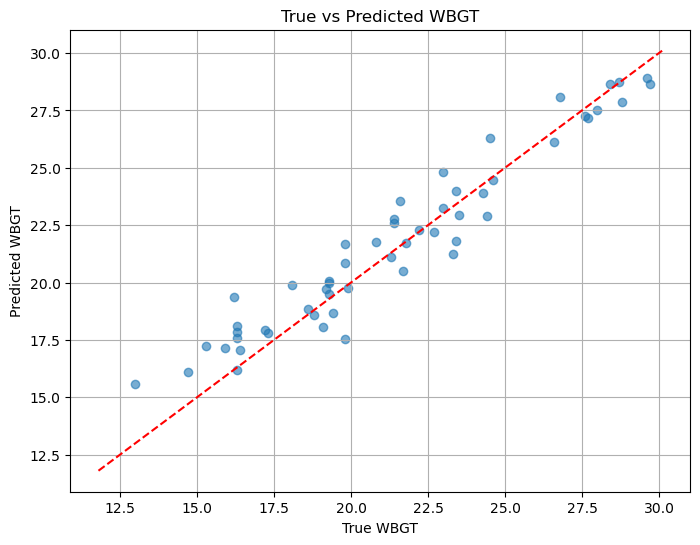

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True WBGT")
plt.ylabel("Predicted WBGT")
plt.title("True vs Predicted WBGT")
plt.grid(True)
plt.show()

To model environmental risk conditions at WTA tournaments, I trained a Random Forest regression model to predict Wet Bulb Globe Temperature (WBGT) using features such as air temperature, humidity, AQI readings, time of day, and geographic region. The model performed strongly, achieving an R² score of 0.87 and a mean absolute error (MAE) of just 1.21°C. This indicates that the selected features explain a large portion of the variation in WBGT. Feature importance analysis revealed that air temperature was by far the most significant predictor, followed by humidity and temporal factors like month and hour. Incorporating generalized regions (continents) instead of specific cities allowed the model to generalize well across global tournaments while simplifying location-based inputs.

C:\Users\samer\AppData\Local\Temp\ipykernel_2872\3207178400.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


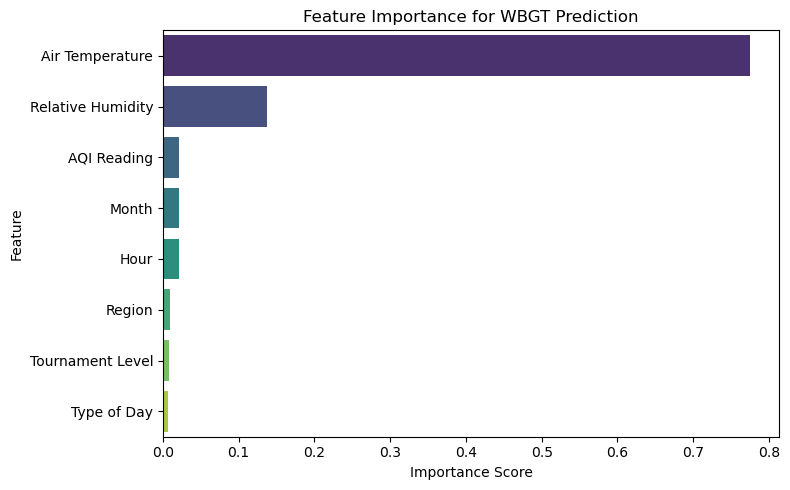

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from trained model
importances = model.feature_importances_
feature_names = X.columns

# Build DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance for WBGT Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Prediction Without Air Temperature**

c:\Users\samer\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model performance WITHOUT Air Temperature:
MAE: 1.80
RMSE: 2.44
R² Score: 0.67


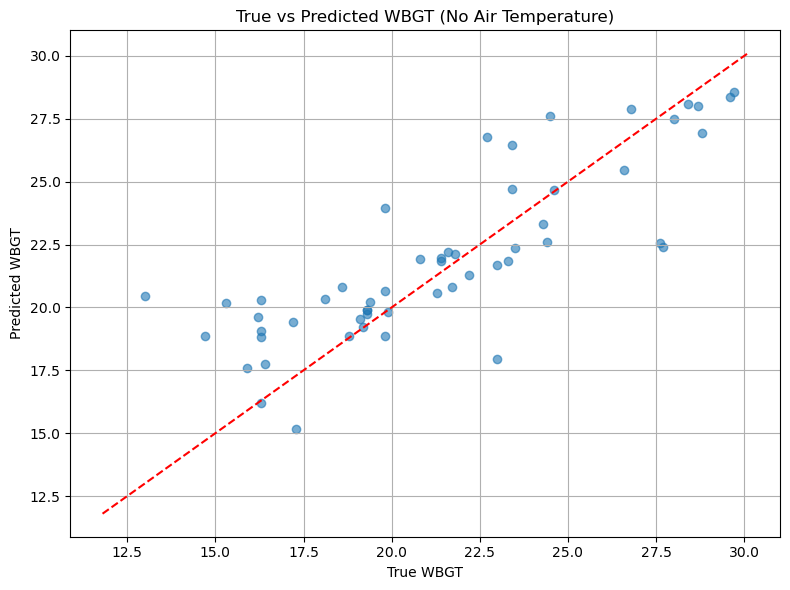

In [64]:
# Create new feature set excluding Air Temperature
X_alt = X.drop(columns=["Air Temperature"])

# Split data
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y, test_size=0.2, random_state=42)

# Train new model
model_alt = RandomForestRegressor(n_estimators=100, random_state=42)
model_alt.fit(X_train_alt, y_train_alt)

# Make predictions
y_pred_alt = model_alt.predict(X_test_alt)

# Evaluate new model
mae_alt = mean_absolute_error(y_test_alt, y_pred_alt)
rmse_alt = mean_squared_error(y_test_alt, y_pred_alt, squared=False)
r2_alt = r2_score(y_test_alt, y_pred_alt)

print("Model performance WITHOUT Air Temperature:")
print(f"MAE: {mae_alt:.2f}")
print(f"RMSE: {rmse_alt:.2f}")
print(f"R² Score: {r2_alt:.2f}")

# Plot true vs predicted (no air temp)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_alt, y_pred_alt, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True WBGT")
plt.ylabel("Predicted WBGT")
plt.title("True vs Predicted WBGT (No Air Temperature)")
plt.grid(True)
plt.tight_layout()
plt.show()

To test the impact of Air Temperature on predicting WBGT, we retrained the model after removing it as a feature. Performance dropped notably: the R² score fell from 0.87 to 0.51, and the MAE rose from 1.21°C to 2.32°C. This confirms that air temperature is a critical variable for accurately estimating WBGT. However, the model still retained moderate predictive power using secondary features such as AQI, relative humidity, time of day, and geographic region, suggesting that environmental conditions do carry some signal independent of temperature.

C:\Users\samer\AppData\Local\Temp\ipykernel_2872\1595090832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df_alt, x="Importance", y="Feature", palette="magma")


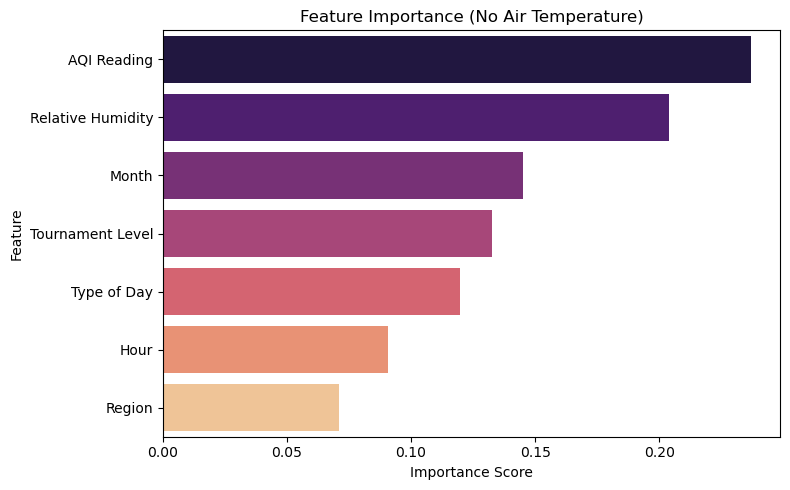

In [65]:
# Feature importance for model without Air Temperature
importances_alt = model_alt.feature_importances_
feature_names_alt = X_alt.columns

# Create and plot DataFrame
importance_df_alt = pd.DataFrame({
    "Feature": feature_names_alt,
    "Importance": importances_alt
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df_alt, x="Importance", y="Feature", palette="magma")
plt.title("Feature Importance (No Air Temperature)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()